# Bank Loan Modelling

## Importing modules and data

<b>The classification goal is to predict the likelihood of a liability customer buying personal
loans.

dataset: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [92]:
#path of your csv file
path='data/Bank_Personal_Loan_Modelling.xlsx'
df=pd.read_excel(path,'Data')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Understanding the Data

 <b>Attributes Information</b>
    
    1. ID: Customer ID
    2. Age: Customer's age in completed years
    3. Experience: #years of professional experience
    4. Income: Annual income of the customer
    5. ZIP Code: Home Address ZIP code.
    6. Family: Family size of the customer
    7. CCAvg: Avg. spending on credit cards per month
    8. Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional
    9. Mortgage: Value of house mortgage if any.
    10. Personal Loan: Did this customer accept the personal loan offered in the last campaign?
    11. Securities Account: Does the customer have a securities account with the bank?
    12. CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
    13. Online: Does the customer use internet banking facilities?
    14. Credit card: Does the customer use a credit card issued by the bank?

In [93]:
df.shape

(5000, 14)

In [94]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


1. Experience contains some of the negative values and experience can't be negative
2. The max of Income, Experience, CCAvg, Mortgage, Security Account, CD Accounts, CreditCard is much higher than their mean

In [95]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<b>Data doesn't contain any null values so now lets find either they are in proper datatypes or not

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<b>Each attribute is in proper datatype i.e., int or float attributes doesn't contain character or object data

In [97]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<b>On the basis of number of unique values we can seperate the continuous and categorical data

In [98]:
categorical_variables=[col for col in df.columns if df[col].nunique()<=5]
print(categorical_variables)
continuous_variables=[col for col in df.columns if df[col].nunique()>5]
print(continuous_variables)

['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


<B>We will remove the Personal Loan from categorical variable list as it is the target variable (Dependent Variable) and ID from the continuous variable list as it doesn't take part in data modeling

In [99]:
categorical_variables.remove("Personal Loan")
print(categorical_variables)
continuous_variables.remove("ID")
print(continuous_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


# Data Visualization

### Univarient Analysis

<b>Analysing the distribution of particular attributes

<b>Continuous variable

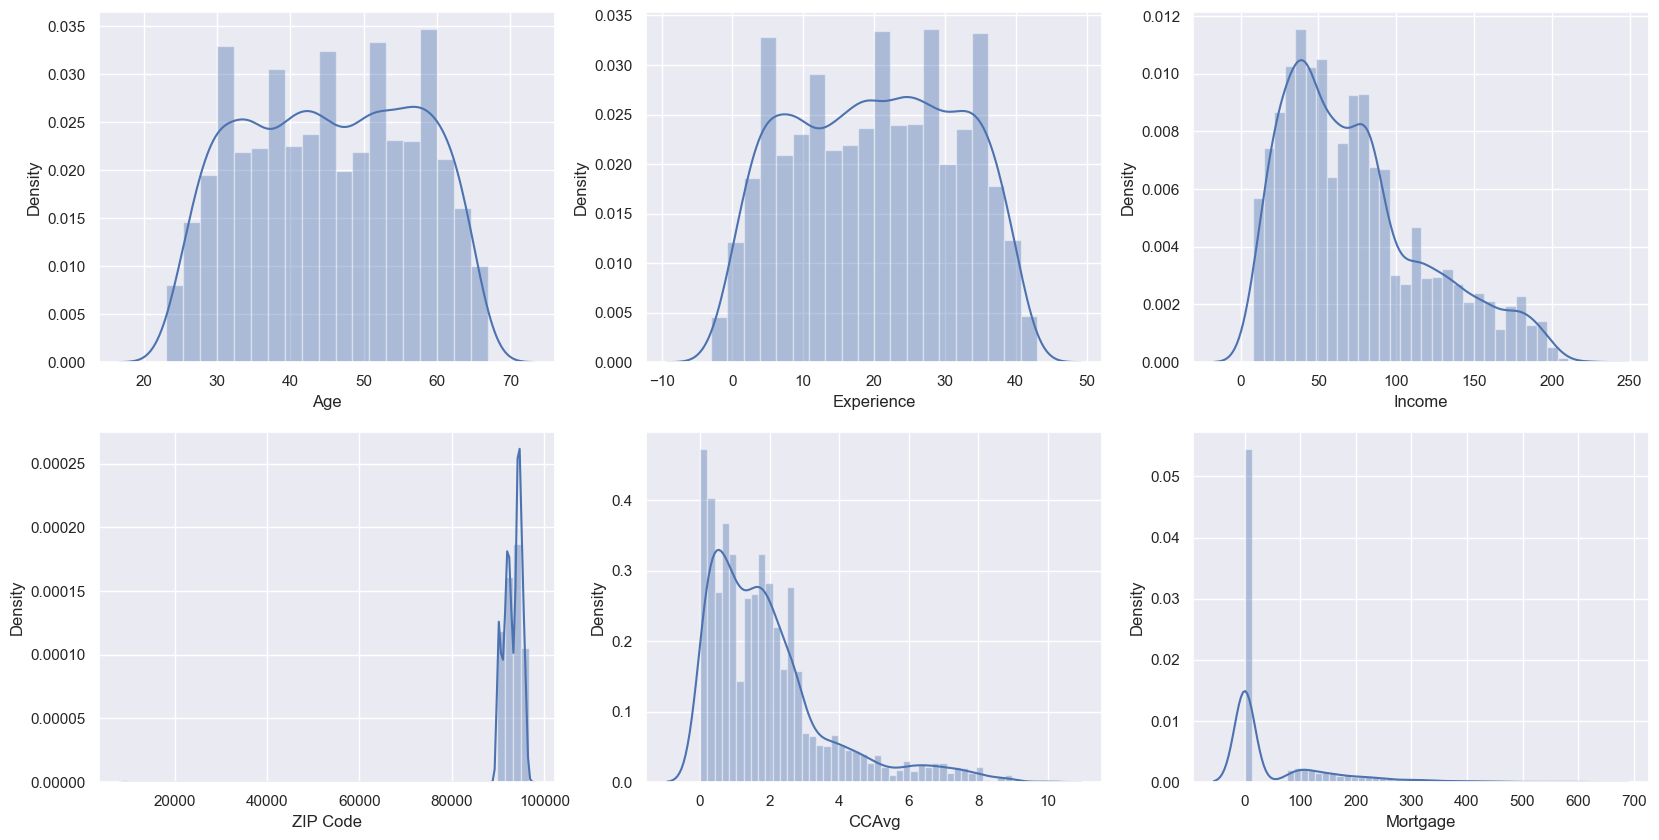

In [100]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.distplot(df[col])

1. We can see that Age and Experience are uniformaly distributed and show a good similarities in distribution.
2. Income, CCAvg, Mortgage are positive Skew
3. ZIP code is negative Skew or it contain values from single region.
4. Mortgage contain most of the values as 0

<b>Categorical variables

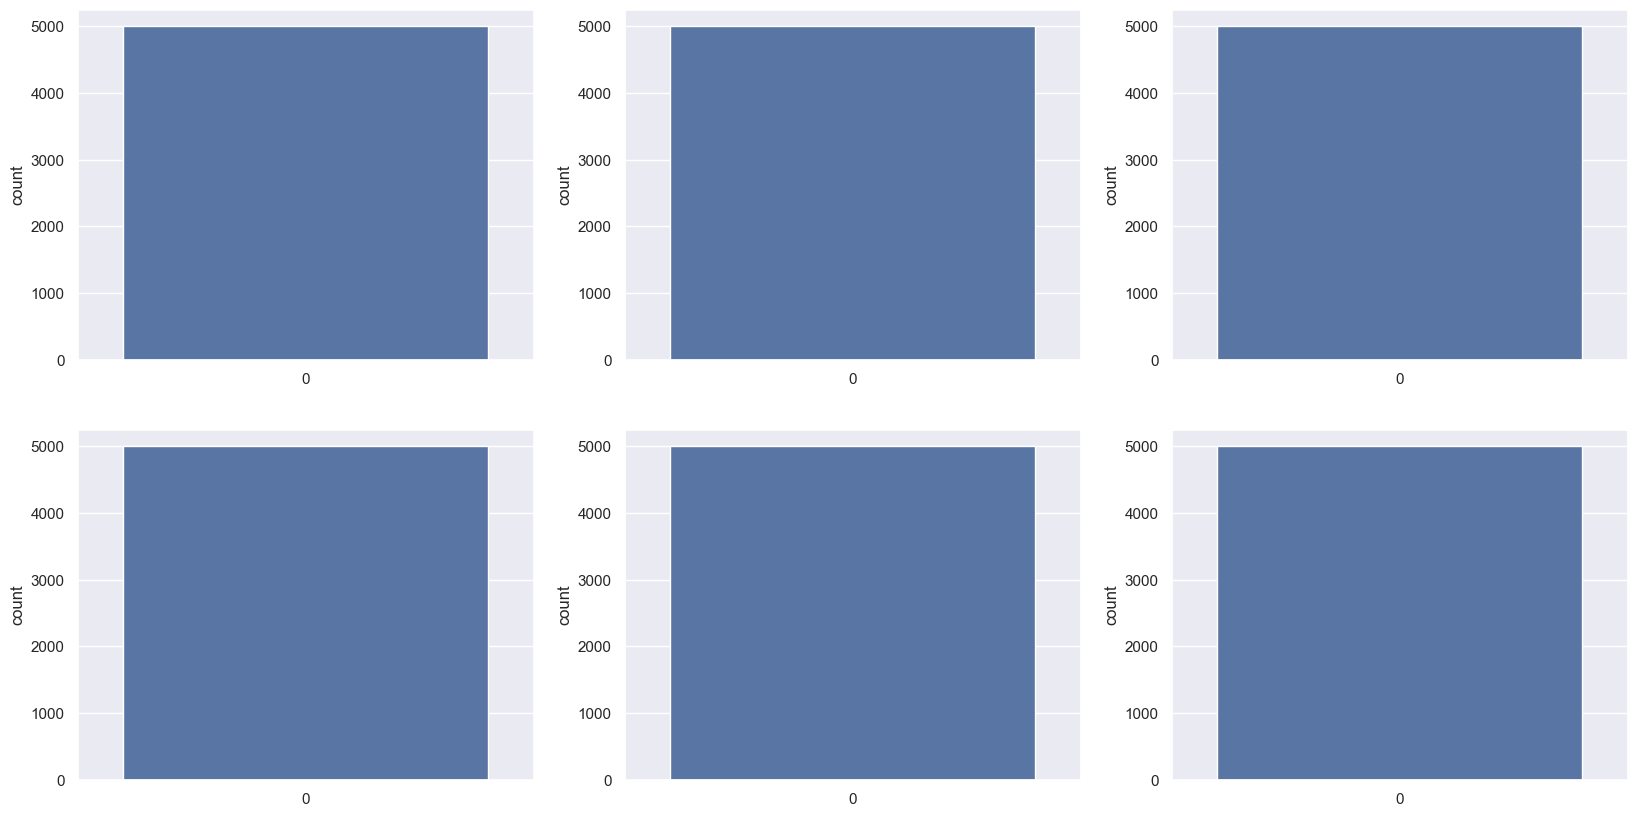

In [101]:
fig=plt.figure(figsize=(20,10))
#fig.subplots_adjust(wspace=0.4,hspace=0.4)
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(df[col])

1. Most of the customer doesn't have Securities Account, CD Account and CreditCard
2. More number of customer use internet banking facilities.
3. More number of customer are Undergrad and have family size one.

### Bivariate Analysis 

<b>Analysing each column (Independent Attribute) first in regard with Personal Loan (Dependent attribute) and then relating them with one another for finding patterns in data

<b>Continious Variables

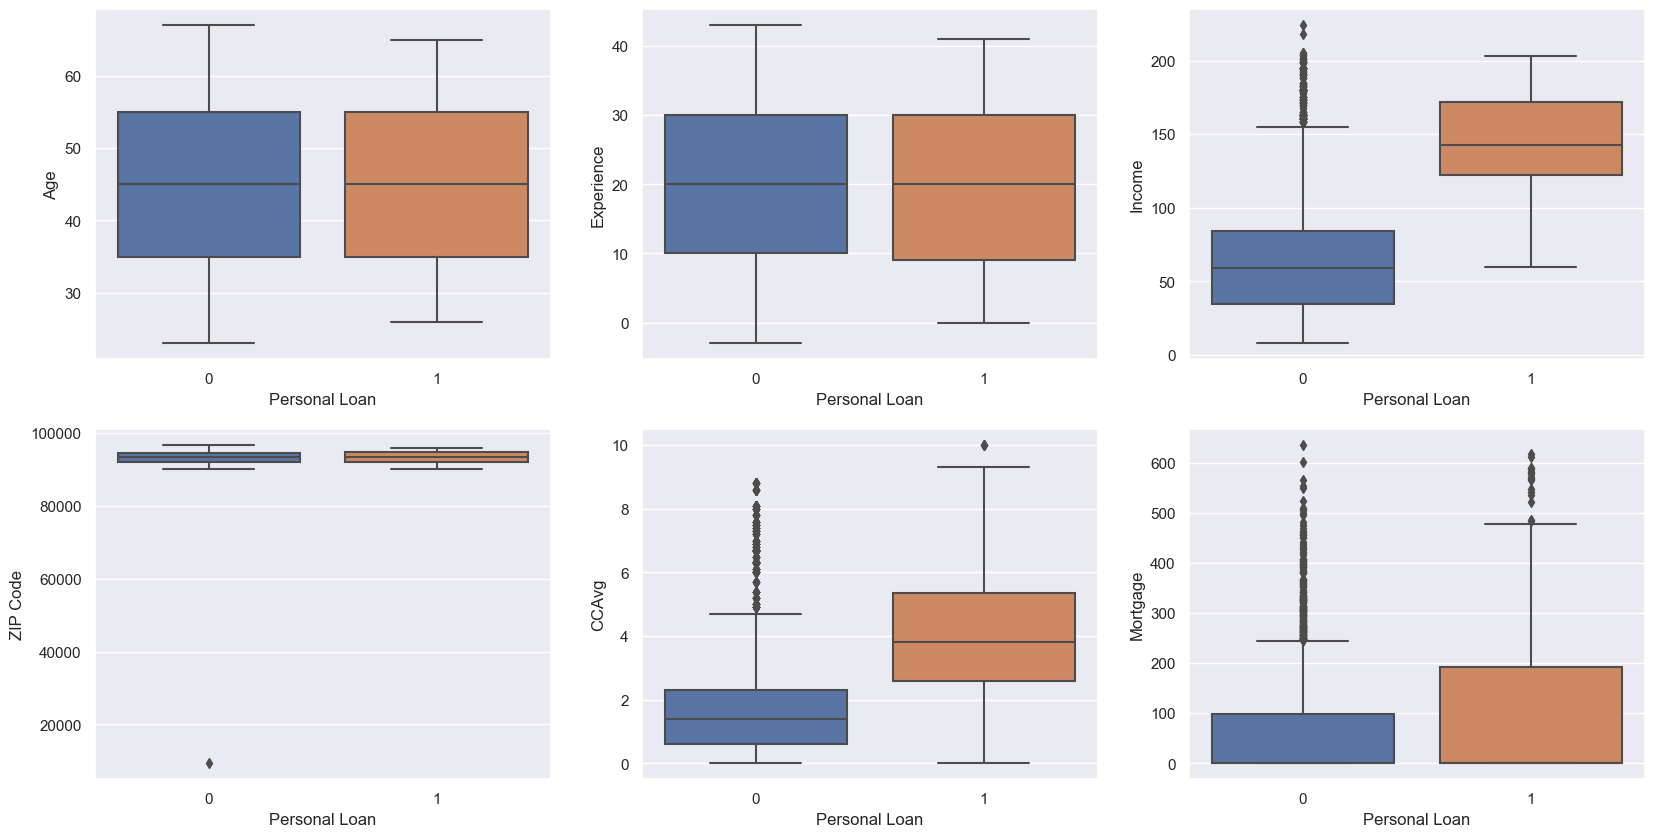

In [102]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.boxplot(y=df[col],x=df['Personal Loan'])

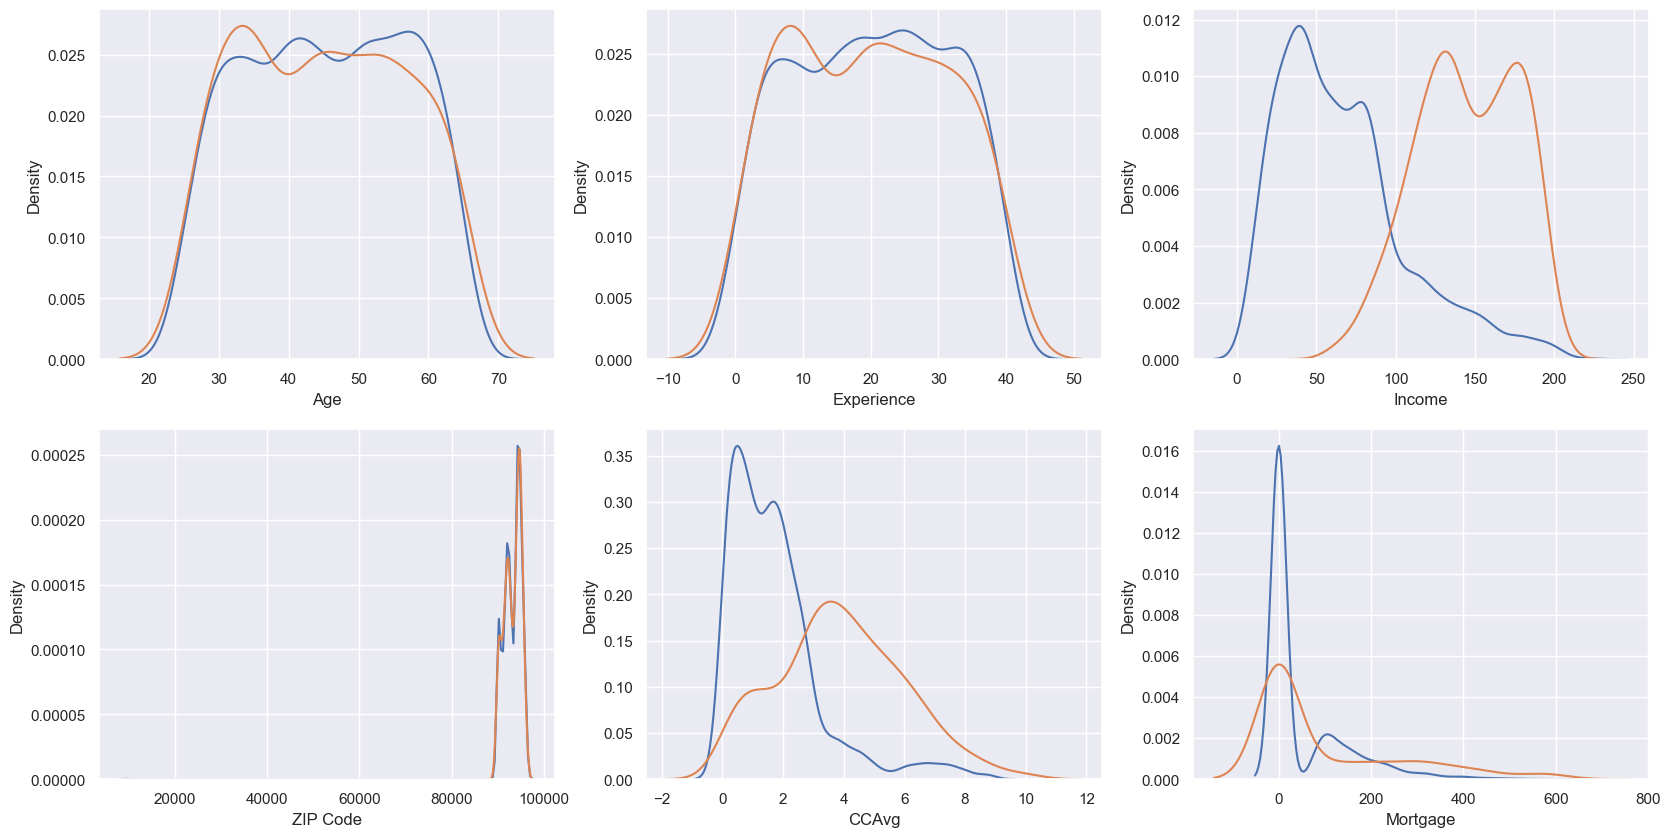

In [103]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continuous_variables):
    ax=fig.add_subplot(2,3,i+1)
    ax1=sns.distplot(df[col][df['Personal Loan']==0],hist=False,label='No Personal Lone')
    sns.distplot(df[col][df['Personal Loan']==1],hist=False,ax=ax1,label='Personal Lone')

1. Personal Loan doesn't show variations with Age and Experience.
2. Income has a good effect on Personal Loan Customers with High Income have more chances of having Personal Loan.
3. CCAvg also show a good relationship with Personal Loan customers with personal loan have high Avg. spending on credit cards per month
4. Customers want to have high Mortgage have opted for Personal Loan

<b>Categorical Variable

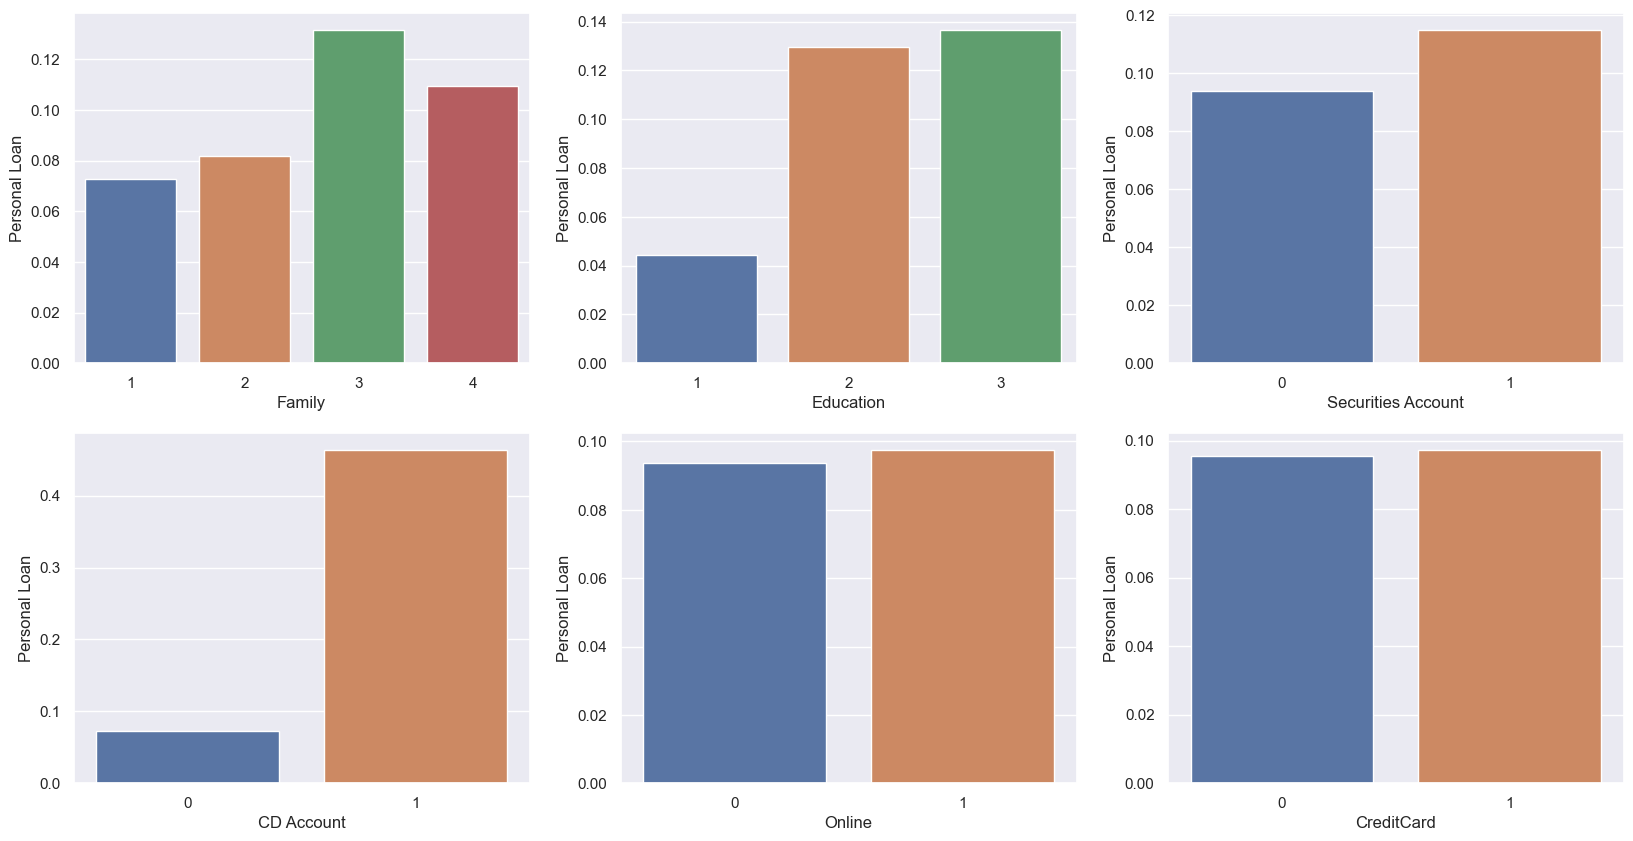

In [104]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.barplot(x=col,y='Personal Loan',data=df,ci=None)

1. Customers with family size equal to 3 have more chances of having Personal Loan.
2. Customers with Undergrad degree have less chances of having Personal Loan as compaired to other customers having Graduate or Advanced/Professional degree
3. Customers with CD Account and Securities Account have more chances of having Personal Loan.
4. Customers using online Facitilies or not, having credit card or not doesn't effect much in chances of having Personal Loan

<b>Income is a strong attribute which effect the chances of having Personl Loan High the Income High the chances of having Personal Loan. So we will analysise Income with other attributes

In [105]:
con=continuous_variables.copy()
con.remove('Income')
con

['Age', 'Experience', 'ZIP Code', 'CCAvg', 'Mortgage']

<Axes: xlabel='Income', ylabel='Age'>

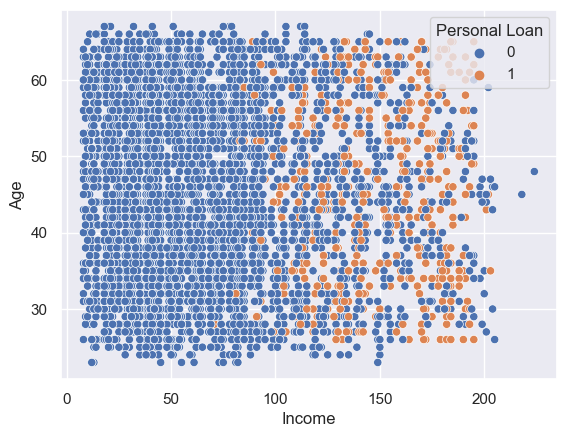

In [106]:
sns.scatterplot(x='Income',y='Age', hue='Personal Loan', data=df)

<Axes: xlabel='Income', ylabel='Experience'>

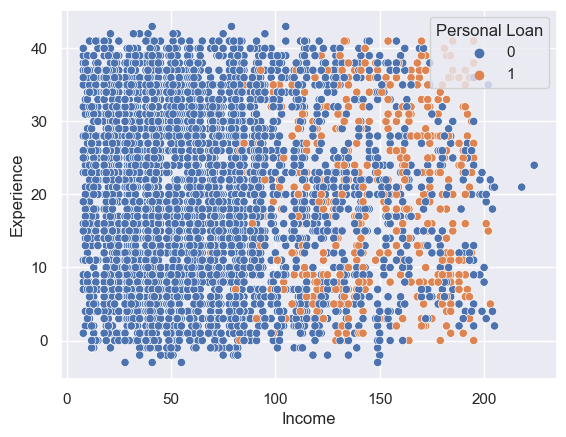

In [107]:
sns.scatterplot(x='Income',y='Experience', hue='Personal Loan', data=df)

<Axes: xlabel='Personal Loan', ylabel='Income'>

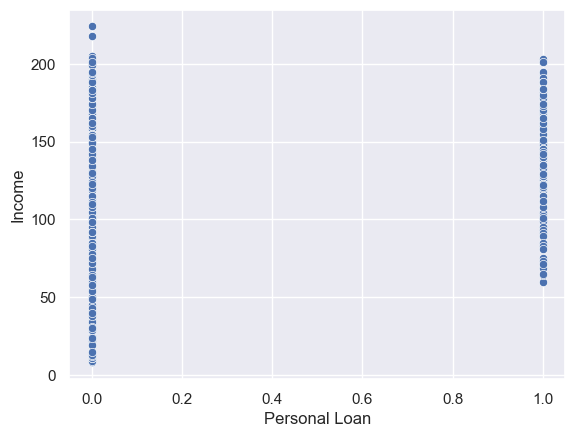

In [108]:
sns.scatterplot(x='Personal Loan', y='Income', data=df)

1. Age and Experience have not effect much as customer with high income no matter of what age group have chances of having Personal Loan.
2. ZIP Code shows that all the customers are of particular area and they have no pattern in chances of having personal loan.
3. Customers with high income and having personal loan shows high Avg. spending on credit cards per month and high Value of house mortgage

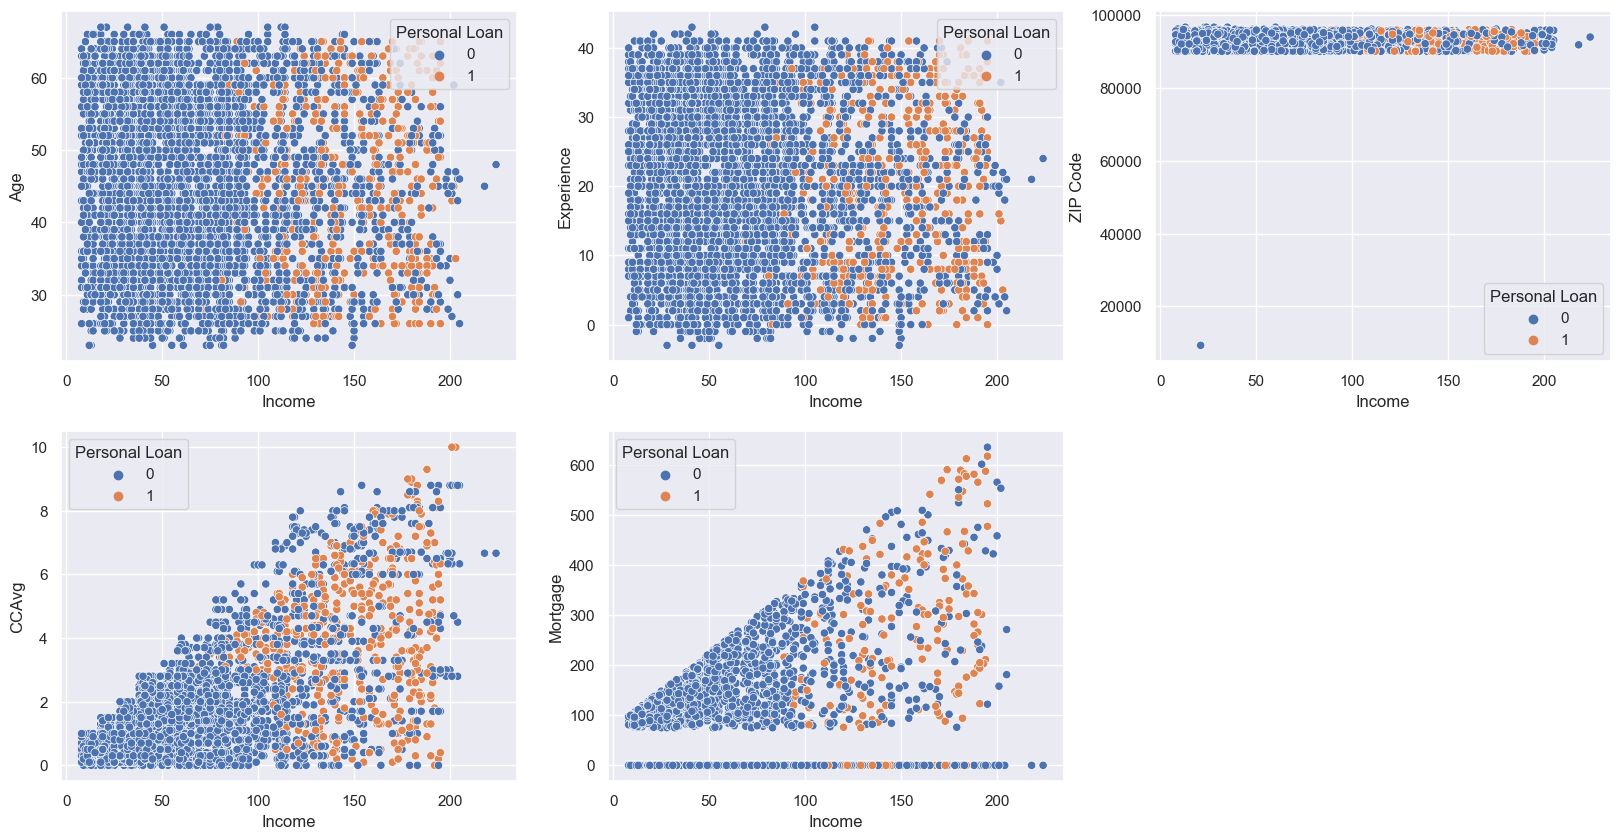

In [109]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x='Income', y=col, hue='Personal Loan',data=df)

1. Customers with high Degrees and having family size greater then 3 with high income have personal loan.
2. Customers with CD Accounts have chances of having Personal Loan

<b> After income we will find relation of CCAvg with other attributes

In [110]:
con.remove('CCAvg')

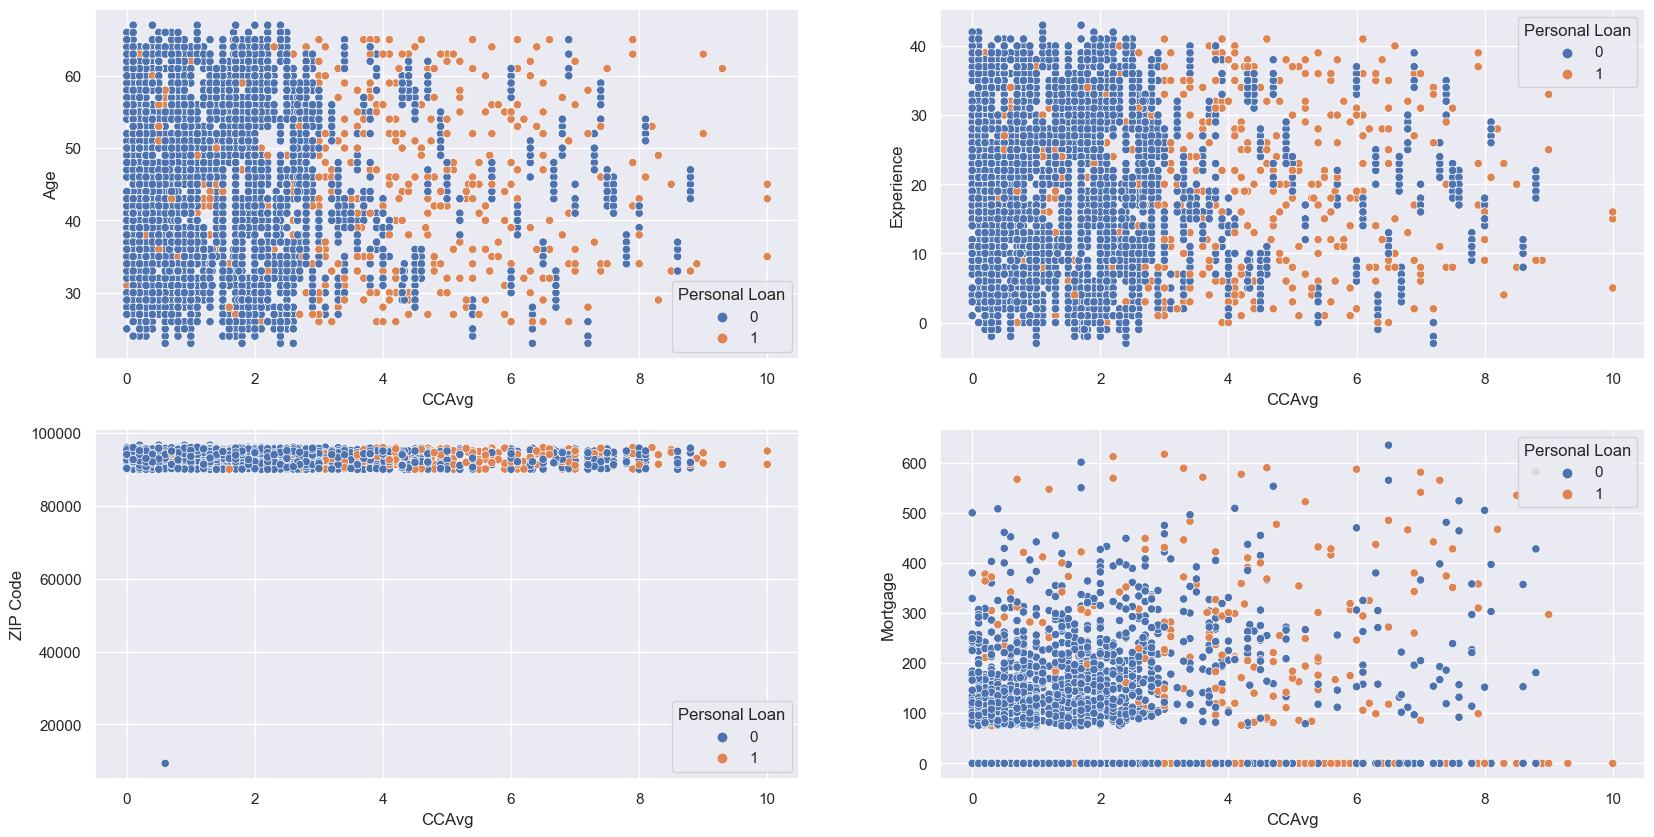

In [111]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(con):
    ax=fig.add_subplot(2,2,i+1)
    sns.scatterplot(x='CCAvg',y=col,hue='Personal Loan',data=df)

1. Age and Experience show same patterns on customers with personal loan or not.
2. high CCAvg and Mortgage have more chances of customer having Personal Loan

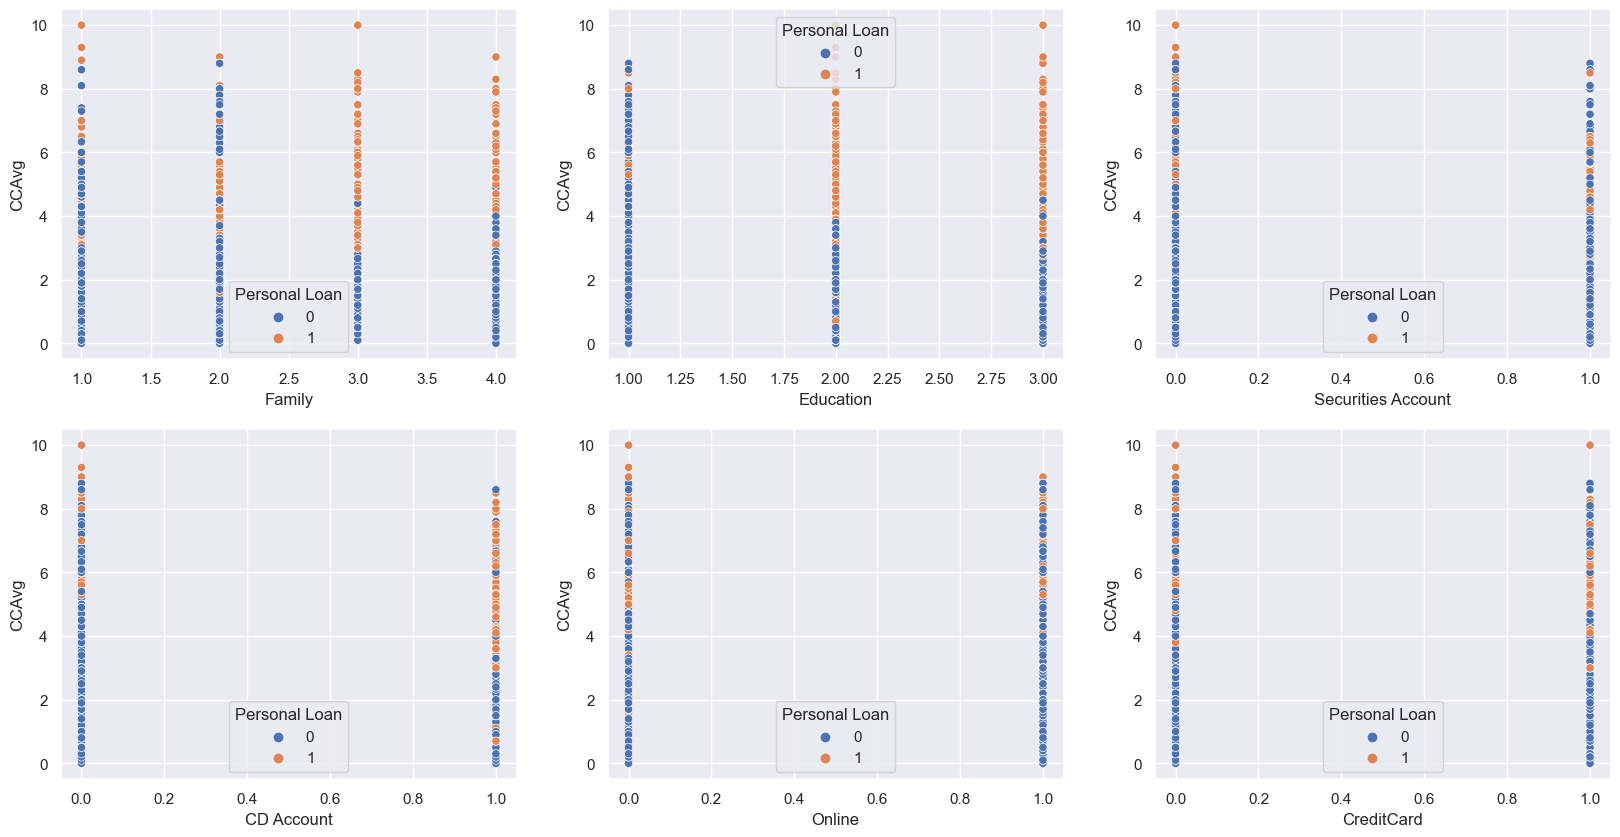

In [112]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.scatterplot(x=col,y='CCAvg',hue='Personal Loan',data=df)

1. CCAvg Shows similar trends as shown by Income

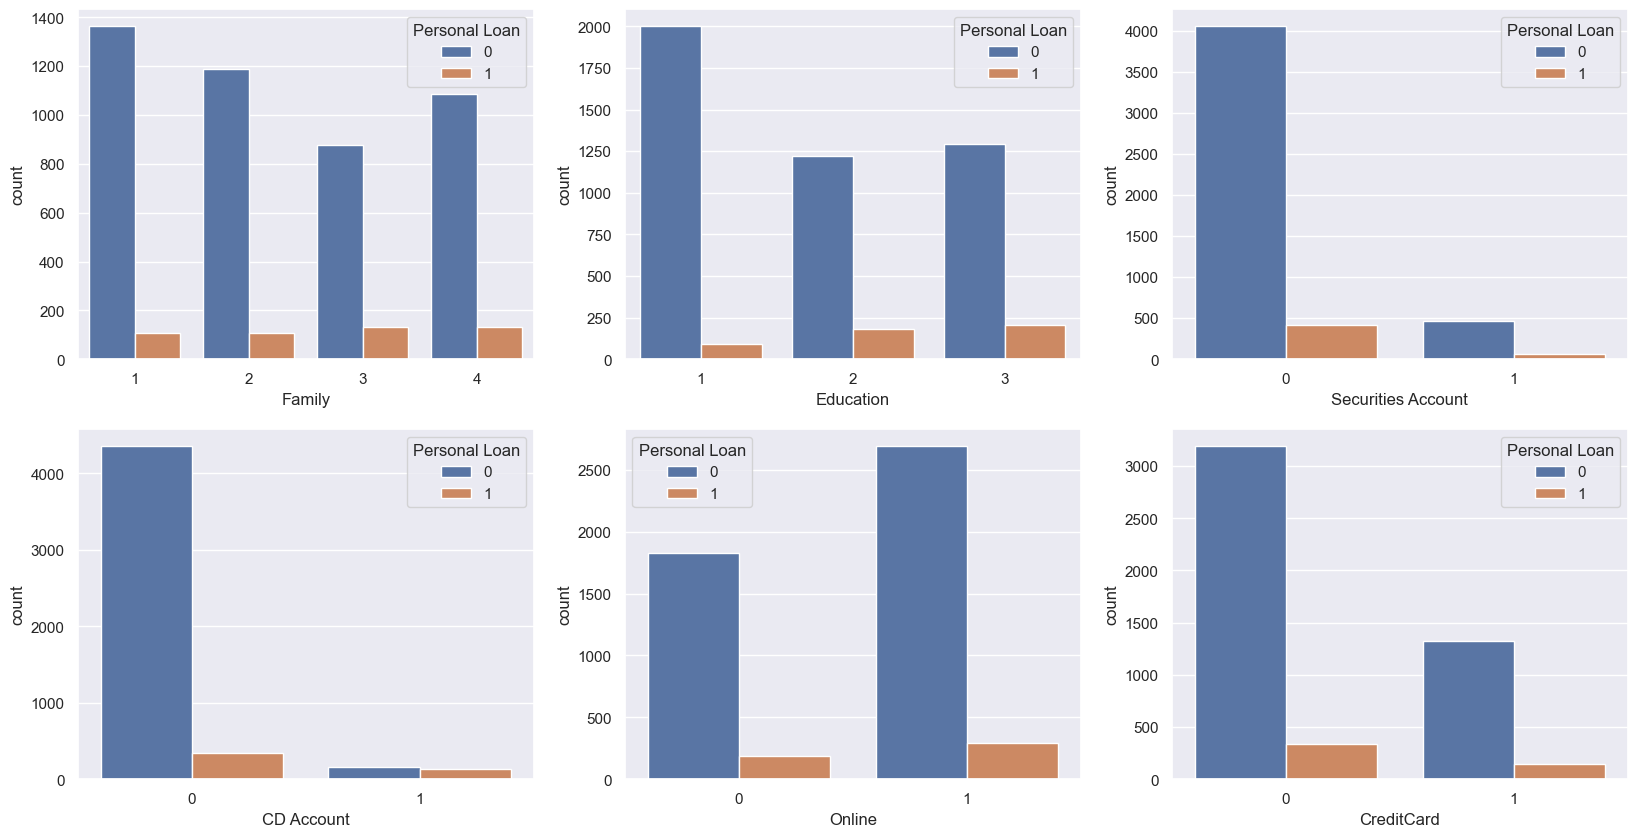

In [113]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(categorical_variables):
    ax=fig.add_subplot(2,3,i+1)
    sns.countplot(x=col,hue='Personal Loan',data=df)

<b> these graph clearly depicts the facts that we had observed previously above like person with CD Account have more chances of having Personal Loan

# Feature Engineering

### Data Cleaning

In [114]:
df.drop_duplicates(inplace=True)

In [115]:
df.shape

(5000, 14)

<b>Since there are no duplicate enteries or row in data so we can set ID as index of dataframe

In [116]:
df.set_index("ID",inplace=True)

<b> Since ZIP Code doesn't show any effect on the chances of Personal Loan it is better to remove it form our data

In [117]:
df.drop('ZIP Code',axis=1,inplace=True)

Zip code contain data of particular area so it contain minimum variations so we removed it.

<b>Finding relationship between Experience and Age

<Axes: title={'center': 'Correlation'}>

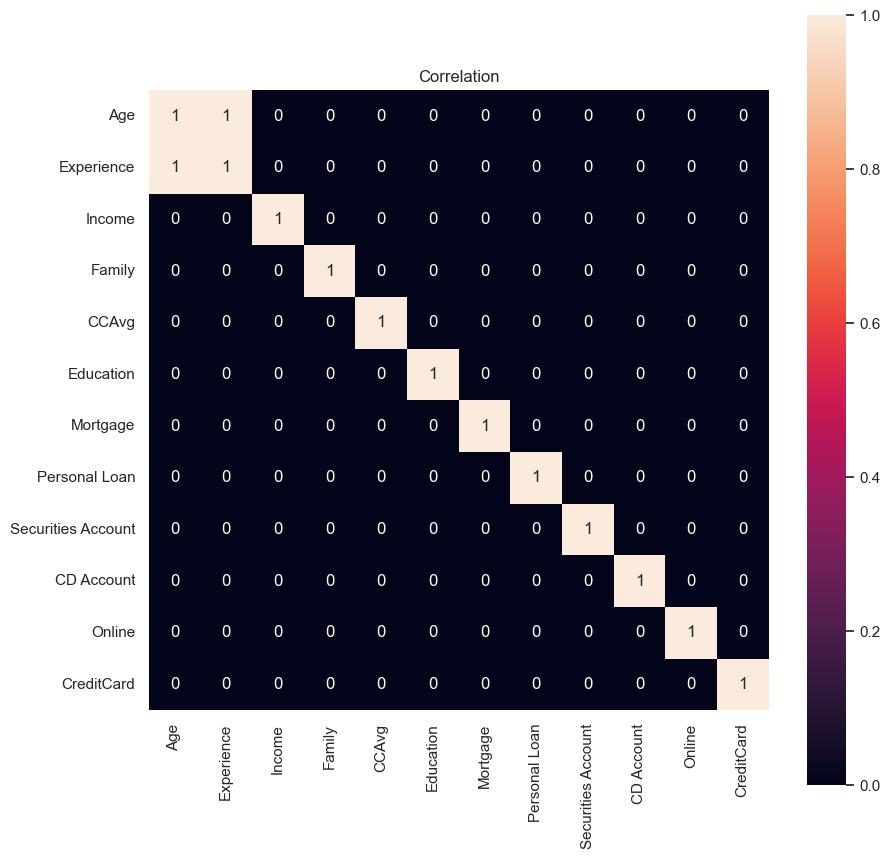

In [118]:
corr=df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation')
sns.heatmap(corr > 0.90, annot=True, square=True)

In [119]:
df[['Age','Experience','Personal Loan']].corr()

,Age,Experience,Personal Loan
Age,1.000000,0.994215,-0.007726
Experience,0.994215,1.000000,-0.007413
Personal Loan,-0.007726,-0.007413,1.000000


since Age shows a little better correlation with Personal loan we will drop the Experience attribute

In [120]:
df.drop('Experience',axis=1,inplace=True)

<b>Creating Attributes

We will try to create a new feature Account contain 1 if any customer is having either CD Account or Security Account or zero if customer have none of them and will try to find its relation with target variable if it shows a better relation compaired to other two then we will keep it otherwise we will remove it

In [121]:
df['Account']=df['CD Account']+df['Securities Account']

In [122]:
df[['CD Account','Securities Account','Account','Personal Loan']].corr()

,CD Account,Securities Account,Account,Personal Loan
CD Account,1.000000,0.317034,0.756219,0.316355
Securities Account,0.317034,1.000000,0.860312,0.021954
Account,0.756219,0.860312,1.000000,0.185185
Personal Loan,0.316355,0.021954,0.185185,1.000000


Since it shows a week correlation as compaired to CD Account we will drop it 

In [123]:
df.drop('Account',axis=1,inplace=True)

we will now try to create a attribute facilities which will contain 1 if customer uses the bank facilities like online banking or credit card else it will contain 0 and then we will check for relation with the target variable if it is better then the previous one we will keep that attribute

In [124]:
df['Facilities']=df['Online']+df['CreditCard']

In [125]:
df[['Facilities','Online','CreditCard','Personal Loan']].corr()

,Facilities,Online,CreditCard,Personal Loan
Facilities,1.000000,0.734052,0.682178,0.006493
Online,0.734052,1.000000,0.004210,0.006278
CreditCard,0.682178,0.004210,1.000000,0.002802
Personal Loan,0.006493,0.006278,0.002802,1.000000


We will keep the Facilities attribute and drop the Online and CreditCard attributes

In [126]:
df.drop(['Online','CreditCard'],axis=1,inplace=True)

In [127]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Facilities
ID,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0
2,45,34,3,1.5,1,0,0,1,0,0
3,39,11,1,1.0,1,0,0,0,0,0
4,35,100,1,2.7,2,0,0,0,0,0
5,35,45,4,1.0,2,0,0,0,0,1


<b>Applying Scaling

In [128]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [129]:
scaled_df=scaler.fit_transform(df.drop('Personal Loan',axis=1))

In [130]:
scaled_df=pd.DataFrame(scaled_df)

In [131]:
scaled_df.columns=df.drop('Personal Loan',axis=1).columns
scaled_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Facilities
0,-1.774417,-0.538229,1.397414,-0.193371,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
1,-0.029524,-0.864109,0.525991,-0.250595,-1.049078,-0.555524,2.928915,-0.25354,-1.327815
2,-0.552992,-1.363793,-1.216855,-0.536720,-1.049078,-0.555524,-0.341423,-0.25354,-1.327815
3,-0.901970,0.569765,-1.216855,0.436103,0.141703,-0.555524,-0.341423,-0.25354,-1.327815
4,-0.901970,-0.625130,1.397414,-0.536720,0.141703,-0.555524,-0.341423,-0.25354,0.162772


# Model Development

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [133]:
X=scaled_df
y=df['Personal Loan']

In [134]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [135]:
model_list=[]
model_f1_score=[]
model_accuracy_score=[]

### LogisticRegression

In [136]:
model_list.append('LogisticRegression')
lm=LogisticRegression()

In [137]:
lm.fit(x_train,y_train)

LogisticRegression()

In [138]:
yhat_lm=lm.predict(x_test)

In [139]:
lm_score=f1_score(y_test,yhat_lm)
model_f1_score.append(lm_score)
lm_score

0.6793893129770991

In [140]:
lm_accuracy=accuracy_score(y_test,yhat_lm)
model_accuracy_score.append(lm_accuracy)
lm_accuracy

0.944

In [141]:
print(classification_report(y_test,yhat_lm))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1342
           1       0.86      0.56      0.68       158

    accuracy                           0.94      1500
   macro avg       0.90      0.78      0.82      1500
weighted avg       0.94      0.94      0.94      1500



<Axes: >

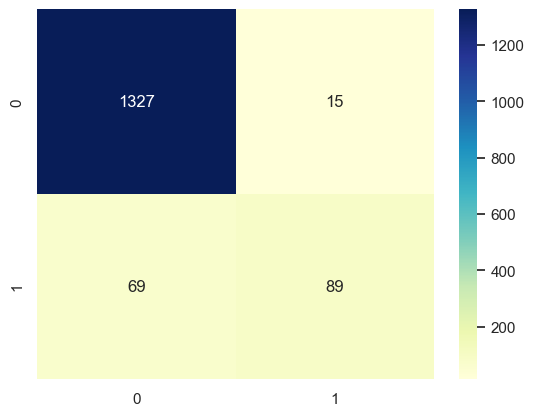

In [142]:
sns.heatmap(confusion_matrix(y_test,yhat_lm),annot=True,fmt='',cmap='YlGnBu')

### DecisionTreeClassifier

In [143]:
model_list.append('DecisionTreeClassifier')
tree=DecisionTreeClassifier()

In [144]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [145]:
yhat_tree=tree.predict(x_test)

In [146]:
tree_score=f1_score(y_test,yhat_tree)
model_f1_score.append(tree_score)
tree_score

0.9171974522292994

In [147]:
tree_accuracy=accuracy_score(y_test,yhat_tree)
model_accuracy_score.append(tree_accuracy)
tree_accuracy

0.9826666666666667

In [148]:
print(classification_report(y_test,yhat_tree))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.92      0.91      0.92       158

    accuracy                           0.98      1500
   macro avg       0.96      0.95      0.95      1500
weighted avg       0.98      0.98      0.98      1500



<Axes: >

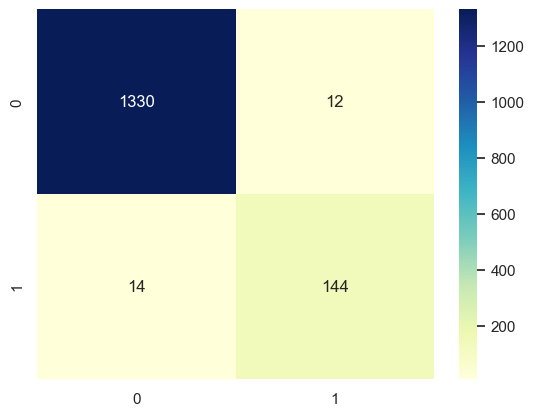

In [149]:
sns.heatmap(confusion_matrix(y_test,yhat_tree),annot=True,fmt='',cmap='YlGnBu')

### RandomForestClassifier

In [150]:
model_list.append('RandomForestClassifier')
forest=RandomForestClassifier()

In [151]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
yhat_forest=forest.predict(x_test)

In [153]:
forest_score=f1_score(y_test,yhat_forest)
model_f1_score.append(forest_score)
forest_score

0.9180327868852458

In [154]:
forest_accuracy=accuracy_score(y_test,yhat_forest)
model_accuracy_score.append(forest_accuracy)
forest_accuracy

0.9833333333333333

In [155]:
print(classification_report(y_test,yhat_forest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1342
           1       0.95      0.89      0.92       158

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



<Axes: >

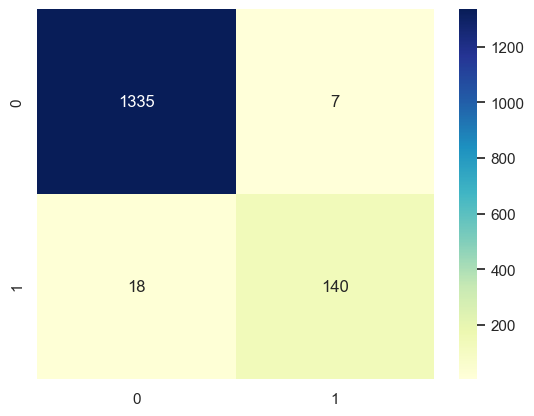

In [156]:
sns.heatmap(confusion_matrix(y_test,yhat_forest),annot=True,fmt='',cmap='YlGnBu')

### SVC

In [157]:
model_list.append('SVC')
svc=SVC()

In [158]:
svc.fit(x_train,y_train)

SVC()

In [159]:
yhat_svc=svc.predict(x_test)

In [160]:
svc_score=f1_score(y_test,yhat_svc)
model_f1_score.append(svc_score)
svc_score

0.8327402135231317

In [161]:
svc_accuracy=accuracy_score(y_test,yhat_svc)
model_accuracy_score.append(svc_accuracy)
svc_accuracy

0.9686666666666667

In [162]:
print(classification_report(y_test,yhat_svc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1342
           1       0.95      0.74      0.83       158

    accuracy                           0.97      1500
   macro avg       0.96      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



<Axes: >

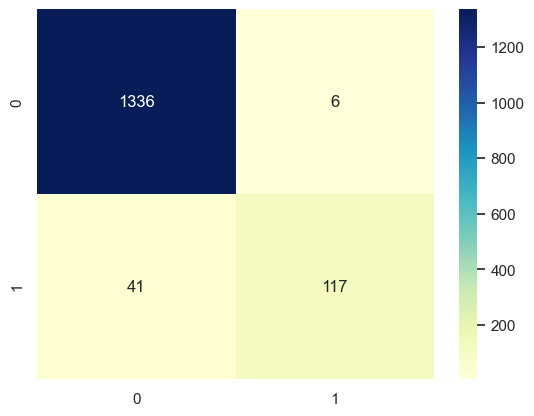

In [163]:
sns.heatmap(confusion_matrix(y_test,yhat_svc),annot=True,fmt='',cmap='YlGnBu')

### KNeighborsClassifier

In [164]:
model_list.append('KNeighborsClassifier')
neighbour=KNeighborsClassifier()

In [165]:
neighbour.fit(x_train,y_train)

KNeighborsClassifier()

In [166]:
yhat_neighbour=neighbour.predict(x_test)

In [167]:
neighbour_score=f1_score(y_test,yhat_neighbour)
model_f1_score.append(neighbour_score)
neighbour_score

0.7838827838827838

In [168]:
neighbour_accuracy=accuracy_score(y_test,yhat_neighbour)
model_accuracy_score.append(neighbour_accuracy)
neighbour_accuracy

0.9606666666666667

In [169]:
print(classification_report(y_test,yhat_neighbour))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1342
           1       0.93      0.68      0.78       158

    accuracy                           0.96      1500
   macro avg       0.95      0.84      0.88      1500
weighted avg       0.96      0.96      0.96      1500



<Axes: >

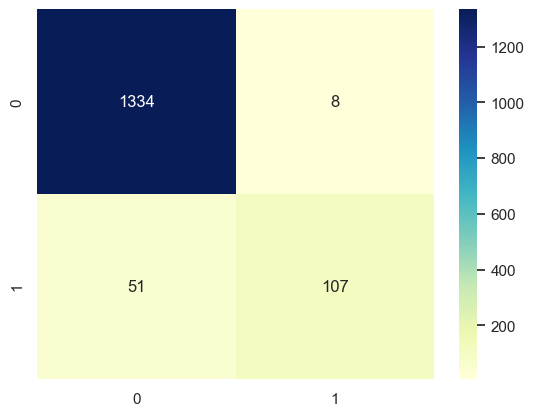

In [170]:
sns.heatmap(confusion_matrix(y_test,yhat_neighbour),annot=True,fmt='',cmap='YlGnBu')

### Ploting the Results

<b>F1-Score

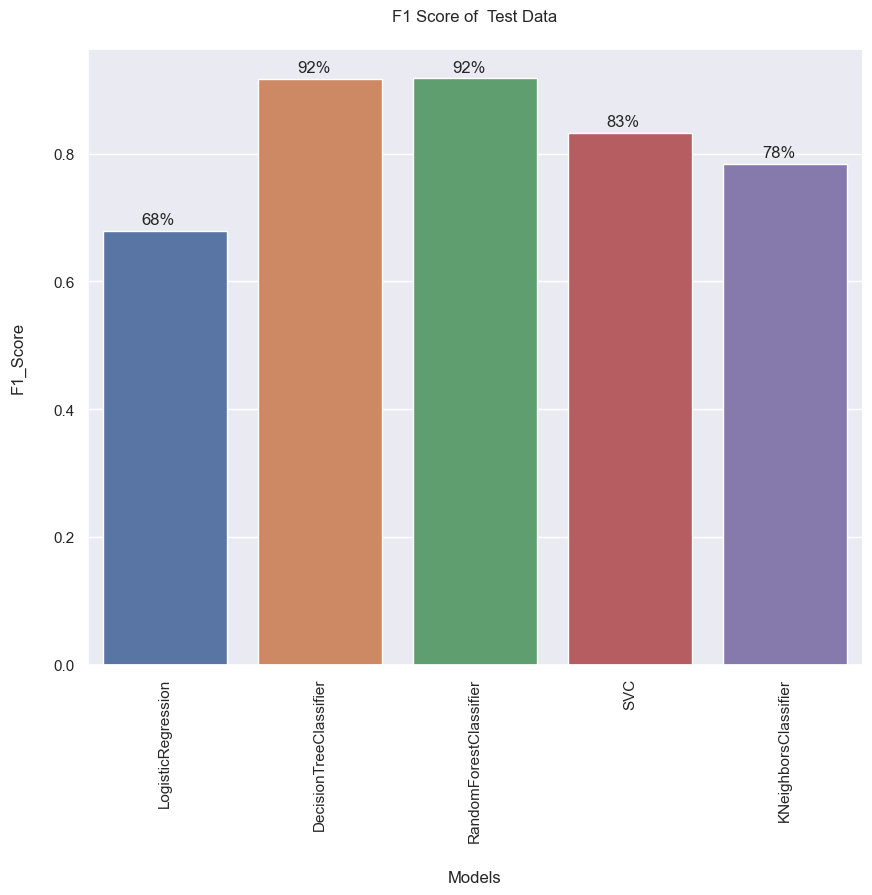

In [171]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x= model_list, y= model_f1_score)
ax.set_title("F1 Score of  Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("F1_Score",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

<b>Accuracy Score

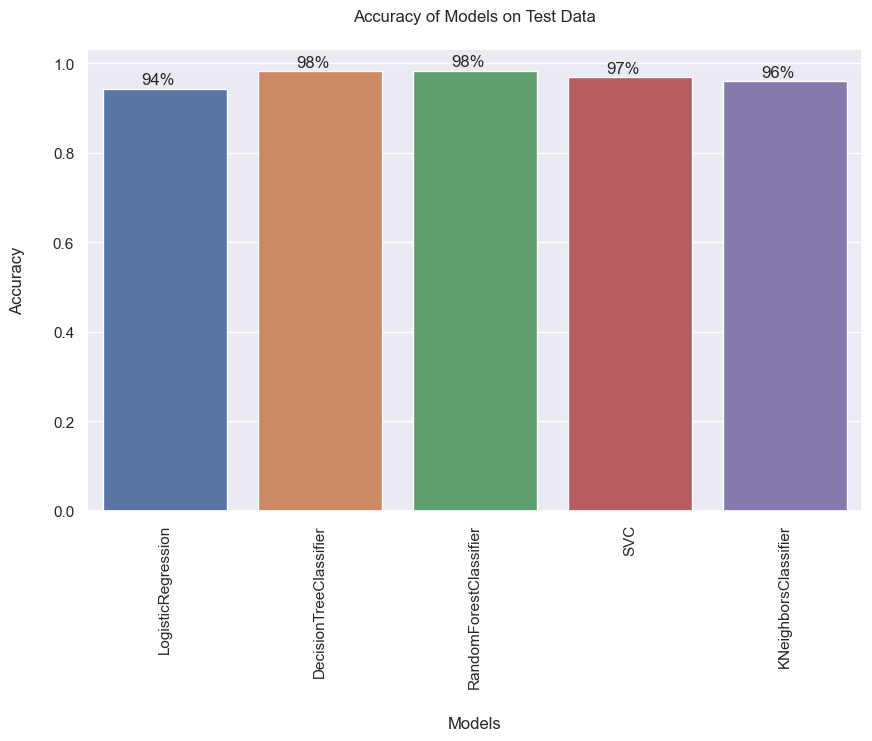

In [172]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x= model_list, y= model_accuracy_score)
ax.set_title("Accuracy of Models on Test Data",pad=20)
ax.set_xlabel("Models",labelpad=20)
ax.set_ylabel("Accuracy",labelpad=20)
plt.xticks(rotation=90)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x+0.25, y + height + 0.01))

# Conclusion

Among the 5 models that we have implemented DecisionTreeClassifier and RandomForestClassifier gives the same and best F1 Score and accuracy score with almost accuracy of 98% and F1-Score of 91%